In [12]:
import pandas as pd
import numpy as np
import matplotlib as plot
import seaborn as sns
import csv
import functions as fn
import classes as cl

In [13]:
teamsN = {'Boston Bruins' : ['BOS','e','a'],'Buffalo Sabres ' : ['BUF','e','a'],'Detroit Red Wings' : ['DET','e','a'],'Florida Panthers' : ['FLA','e','a'],'Montreal Canadiens' : ['MON','e','a'],'Ottawa Senators' : ['OTT','e','a'],'Tampa Bay Lightning' :  ['TB','e','a'],'Toronto Maple Leafs' : ['TOR','e','a'],'Arizona Coyotes' : ['ARI','w','c'],'Chicago Blackhawks' : ['CHI','w','c'],'Colorado Avalanche' : ['COL','w','c'],'Dallas Stars' : ['DAL','w','c'],'Minnesota Wild' : ['MIN','w','c'],'Nashville Preditors' : ['NSH','w','c'],'St. Louis Blues' : ['STL','w','c'],'Winnipeg Jets' : ['WPG','w','c'],'Carolina Hurricanes' : ['CAR','e','m'],'Columbus Blue Jackets' : ['CLB','e','m'],'New York Islanders' : ['NYI','e','m'],'New York Rangers' : ['NYR','e','m'],'New Jersey Devils' :  ['NJ','e','m'],'Philadelphia Flyers' : ['PHI','e','m'],'Pittsburgh Penguins' : ['PIT','e','m'],'Washington Capitals' : ['WAS','e','m'],'Anaheim Ducks' : ['ANA','w','p'],'Calgary Flames' : ['CGY','w','p'],'Edmonton Oilers' : ['EDM','w','p'],'Los Angeles Kings' :  ['LA','w','p'],'San Jose Sharks' :  ['SJ','w','p'],'Seattle Kraken' : ['SEA','w','p'],'Vancouver Canucks' : ['VAN','w','p'],'Vegas Golden Knights' : ['LV','w','p']}

In [14]:
teamsDict = {}

for team in teamsN.items():
    name = team[0]
    id = team[1][0]
    devision = fn.devisionConvert(team[1][2]) 
    conference = fn.conferenceConvert(team[1][1])
    teamsDict[team[1][0]] = cl.Team(id,name,conference,devision)

In [15]:
playerDict = {}
with open('oldCSV/players.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
            if row[0] != 'playerID': 
                playerDict[row[0]] = cl.Player.from_list(row)


In [17]:
with open('20231010-20231108_goals.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        name = row[5]
        for player in playerDict:
            fullName = playerDict[player].fullName()
            if name == fullName: 
                playerDict[player].addGoal()

In [18]:
goalArray = []
for player in playerDict:
    if playerDict[player].getGoals() > 0:
        p = playerDict[player]
        goalArray.append((p.fullName(), p.getGoals(), p.getTeam()))

In [19]:
df = pd.DataFrame(goalArray)
df = df.rename(columns={0:'name',1:'goals',2:'team'})
#df.loc[df['goals']==7]
goalCount = df['goals'].value_counts()

[]

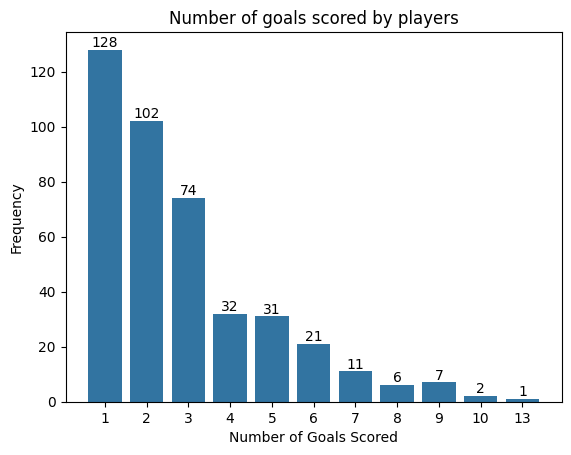

In [20]:
ax = sns.barplot(data=goalCount)
ax.bar_label(ax.containers[0])
ax.set(xlabel='Number of Goals Scored', ylabel='Frequency', title='Number of goals scored by players')
ax.plot()

In [21]:
high = df.loc[df['goals']>=6]
high = high.sort_values(by='goals', ascending=False)
high.reset_index()

,index,name,goals,team
0,91,Auston Matthews,13,TOR
1,391,Brock Boeser,10,VAN
2,86,Nikita Kucherov,10,TB
3,280,Travis Konecny,9,PHI
4,32,Alex DeBrincat,9,DET
5,44,Sam Reinhart,9,FLA
6,133,Mikko Rantanen,9,COL
7,319,Frank Vatrano,9,ANA
8,258,Chris Kreider,9,NYR
9,8,David Pastrnak,9,BOS


In [22]:
for goal in goalArray:
    teamsDict[goal[2]].incrementGoal(goal[1])

In [23]:
teamArray = []
for team in teamsDict:
    teamArray.append((teamsDict[team].ID,teamsDict[team].name,teamsDict[team].goals))
tdf = pd.DataFrame(teamArray)
tdf = tdf.rename(columns={0:'teamID',1:'team',2:'totalGoals'})
tdf = tdf.set_index('teamID')
tdf = tdf.sort_values('totalGoals', ascending=False)